# Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
     1 -- building_windows_float_processed
     2 --building_windows_non_float_processed
     3 --vehicle_windows_float_processed
     4 --vehicle_windows_non_float_processed (none in this database)
     5 --containers
     6 --tableware
     7 --headlamps


In [13]:
import pandas as pd
import numpy as np

In [14]:
glass = pd.read_csv("C:\\Excelr Data\\Assignments\KNN\\glass.csv")


In [15]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [16]:
# Training and Test data using 
from sklearn.model_selection import train_test_split

train,test = train_test_split(glass,test_size = 0.3,random_state= 0) # 0.2 => 20 percent of entire data 


In [17]:
# KNN using sklearn 
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC


In [28]:
# for 3 nearest neighbours 
neigh = KNC(n_neighbors= 3)


In [29]:
# Fitting with training data 
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [30]:
# train accuracy 
train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9]) 


In [31]:
train_acc

0.8456375838926175

In [32]:
# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9]) 


In [33]:
test_acc

0.6461538461538462

In [34]:
# for 7 nearest neighbours
neigh = KNC(n_neighbors=7)


In [35]:
# fitting with training data
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [36]:
# train accuracy 
train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])


In [37]:
train_acc

0.7449664429530202

In [38]:
# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])


In [39]:
test_acc

0.6615384615384615

In [40]:
# for 5 nearest neighbours
neigh = KNC(n_neighbors=5)


In [41]:
# fitting with training data
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
# train accuracy 
train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
train_acc

0.7651006711409396

In [44]:
# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
test_acc

0.6615384615384615

In [52]:
# creating empty list variable 
acc = []

In [53]:
# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
 

In [54]:
for i in range(3,70,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])


In [55]:
import matplotlib.pyplot as plt # library to do visualizations 


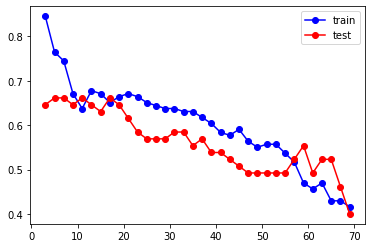

In [60]:
# train accuracy plot 
plt.plot(np.arange(3,70,2),[i[0] for i in acc],"bo-")

# test accuracy plot
plt.plot(np.arange(3,70,2),[i[1] for i in acc],"ro-")

plt.legend(["train","test"])


In [59]:
# best model is least train and high test accuracy
